In [1]:
import numpy as np
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
def deform_blob(blob, max_deform):
    h, w = blob.shape
    flow = np.random.randn(h, w, 2).astype(np.float32) * max_deform
    map_y, map_x = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')
    map_x = (map_x + flow[:, :, 0]).astype(np.float32)
    map_y = (map_y + flow[:, :, 1]).astype(np.float32)
    deformed = cv2.remap(blob, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
    return deformed

def generate_cloud_like_blob_mask(size=256, coverage_limit=0.7):
    mask = np.zeros((size, size), dtype=np.uint8)
    target_pixels = size * size * np.random.uniform(0.0, coverage_limit)
    current_pixels = 0

    while current_pixels < target_pixels:
        temp = np.zeros_like(mask)
        center = (np.random.randint(0, size), np.random.randint(0, size))
        axes = (np.random.randint(10, 100 ), np.random.randint(10, 100))
        angle = np.random.randint(0, 180)
        cv2.ellipse(temp, center, axes, angle, 0, 360, 255, -1)

        deform_strength = np.random.uniform(10, 80)
        temp = deform_blob(temp, max_deform=deform_strength)

        temp = (temp > 50).astype(np.uint8) * 255

        mask = cv2.bitwise_or(mask, temp)
        current_pixels = np.sum(mask > 0)

    return mask

def generate_cloud_masks(output_dir='cloud0to70', num_masks=10):
    os.makedirs(output_dir, exist_ok=True)
    for i in tqdm(range(num_masks), desc="Generating masks"):
        mask = generate_cloud_like_blob_mask()
        cv2.imwrite(os.path.join(output_dir, f'mask_{i}.png'), mask)

generate_cloud_masks()


Generating masks: 100%|█████████████████████████| 10/10 [00:00<00:00, 27.89it/s]


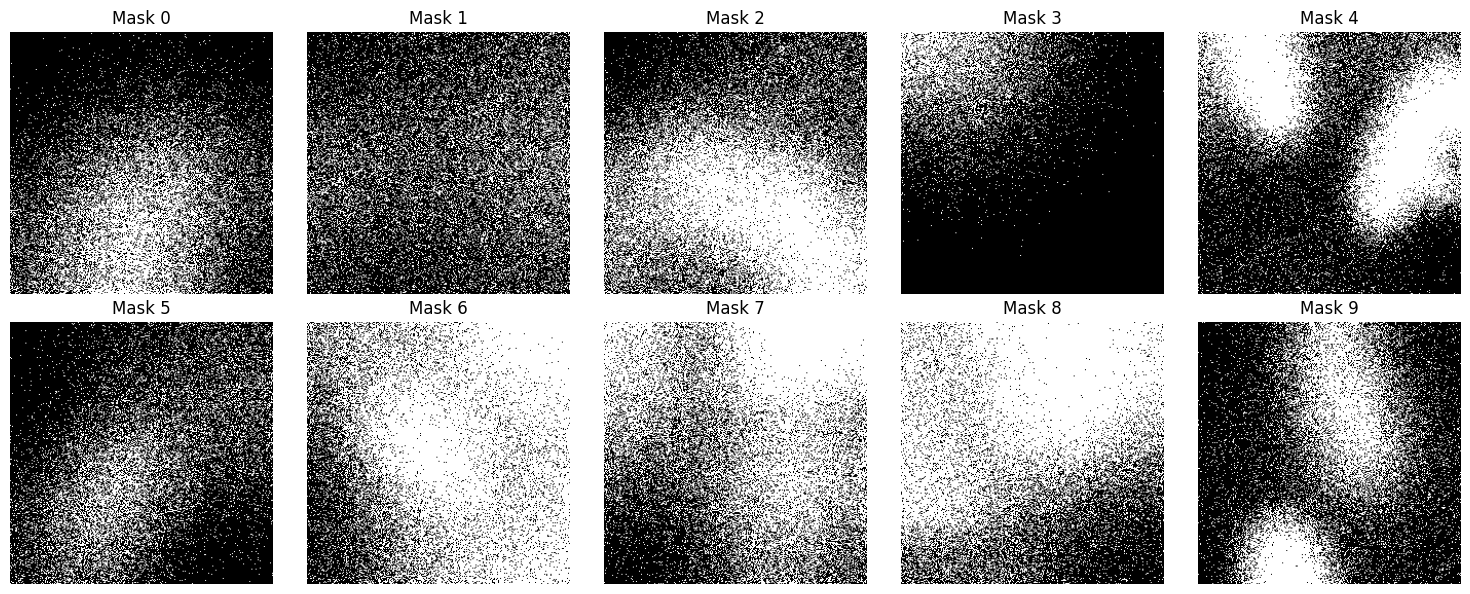

In [2]:
output_dir = "cloud0to70"
num_masks = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6)) axes = axes.flatten()

for i in range(num_masks):
    mask_path = os.path.join(output_dir, f"mask_{i}.png")
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)      axes[i].imshow(mask, cmap="gray")
    axes[i].set_title(f"Mask {i}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()